# Dataset Preparation and Preprocessing for EMNIST Letters

In this notebook, we will download and preprocess the EMNIST Letters dataset. The dataset contains handwritten character images and their corresponding labels. We will extract the images and labels, normalize the data, and visualize some samples.

## Step 1: Install Required Libraries
First, we need to install the required libraries: `datasets`, `emnist`, and `soundfile`.


In [ ]:
!pip install datasets
!pip install emnist
!pip install soundfile

## Step 2: Import Libraries
We will import the necessary libraries for data handling, visualization, and interaction with Google Drive.

In [ ]:
# Mengimpor library yang dibutuhkan
import numpy as np
import tensorflow as tf
from datasets import load_dataset
import os
import shutil
import soundfile as sf
import matplotlib.pyplot as plt
import gzip
import struct

# Mengimpor Google Drive untuk akses file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 3: List Files in Google Drive Directory
Next, we list the files in the Google Drive directory to ensure that the required .gz files are available.

In [ ]:
drive_dir = '/content/drive/MyDrive/Colab-Notebooks/LexiLearn_Machine_Learning'
print(os.listdir(drive_dir))


['gzip.zip', 'Data_Preprocessing.ipynb', 'Dataset_Preparation_and_Preprocessing.ipynb', 'emnist-letters-train-images-idx3-ubyte.gz', 'emnist-letters-train-labels-idx1-ubyte.gz', 'emnist-letters-test-images-idx3-ubyte.gz', 'emnist-letters-test-labels-idx1-ubyte.gz']


## Step 4: Define Paths for the Dataset Files
We will define the paths for the training and testing image and label files in our Google Drive.


In [ ]:
# Path file .gz di Google Drive
drive_file_path_train_images = os.path.join(drive_dir, 'emnist-letters-train-images-idx3-ubyte.gz')
drive_file_path_train_labels = os.path.join(drive_dir, 'emnist-letters-train-labels-idx1-ubyte.gz')
drive_file_path_test_images = os.path.join(drive_dir, 'emnist-letters-test-images-idx3-ubyte.gz')
drive_file_path_test_labels = os.path.join(drive_dir, 'emnist-letters-test-labels-idx1-ubyte.gz')

## Step 5: Extract the .gz Files
We will extract the `.gz` files to obtain the raw image and label data.

In [ ]:
# Path direktori untuk mengekstrak isi file .gz
extracted_dir = '/content/emnist'
os.makedirs(extracted_dir, exist_ok=True)

# Fungsi untuk mengekstrak file .gz
def extract_gz_file(file_path, output_path):
    with gzip.open(file_path, 'rb') as f_in:
        with open(output_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

# Ekstrak file .gz
extracted_train_images_path = os.path.join(extracted_dir, 'emnist-letters-train-images-idx3-ubyte')
extracted_train_labels_path = os.path.join(extracted_dir, 'emnist-letters-train-labels-idx1-ubyte')
extracted_test_images_path = os.path.join(extracted_dir, 'emnist-letters-test-images-idx3-ubyte')
extracted_test_labels_path = os.path.join(extracted_dir, 'emnist-letters-test-labels-idx1-ubyte')

extract_gz_file(drive_file_path_train_images, extracted_train_images_path)
extract_gz_file(drive_file_path_train_labels, extracted_train_labels_path)
extract_gz_file(drive_file_path_test_images, extracted_test_images_path)
extract_gz_file(drive_file_path_test_labels, extracted_test_labels_path)

# Tampilkan isi direktori yang diekstrak untuk memastikan file telah diekstrak dengan benar
print(os.listdir(extracted_dir))

['emnist-letters-test-labels-idx1-ubyte', 'emnist-letters-train-images-idx3-ubyte', 'emnist-letters-test-images-idx3-ubyte', 'gzip', 'emnist-letters-train-labels-idx1-ubyte']


## Step 6: Load and Preprocess the Data
We will define functions to load the EMNIST images and labels, then use these functions to load the training and testing datasets.

In [ ]:
def load_emnist_images(file_path):
    with open(file_path, 'rb') as f:
        magic, num, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows, cols)
    return images

def load_emnist_labels(file_path):
    with open(file_path, 'rb') as f:
        magic, num = struct.unpack('>II', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# Muat data latih dan data uji
train_images_emnist = load_emnist_images(extracted_train_images_path)
train_labels_emnist = load_emnist_labels(extracted_train_labels_path)
test_images_emnist = load_emnist_images(extracted_test_images_path)
test_labels_emnist = load_emnist_labels(extracted_test_labels_path)

# Tampilkan shape dataset
print(f"Shape of training images: {train_images_emnist.shape}")
print(f"Shape of training labels: {train_labels_emnist.shape}")
print(f"Shape of test images: {test_images_emnist.shape}")
print(f"Shape of test labels: {test_labels_emnist.shape}")

Shape of training images: (124800, 28, 28)
Shape of training labels: (124800,)
Shape of test images: (20800, 28, 28)
Shape of test labels: (20800,)


## Step 7: Visualize the Data
We will visualize some sample images from the training dataset to verify the data.

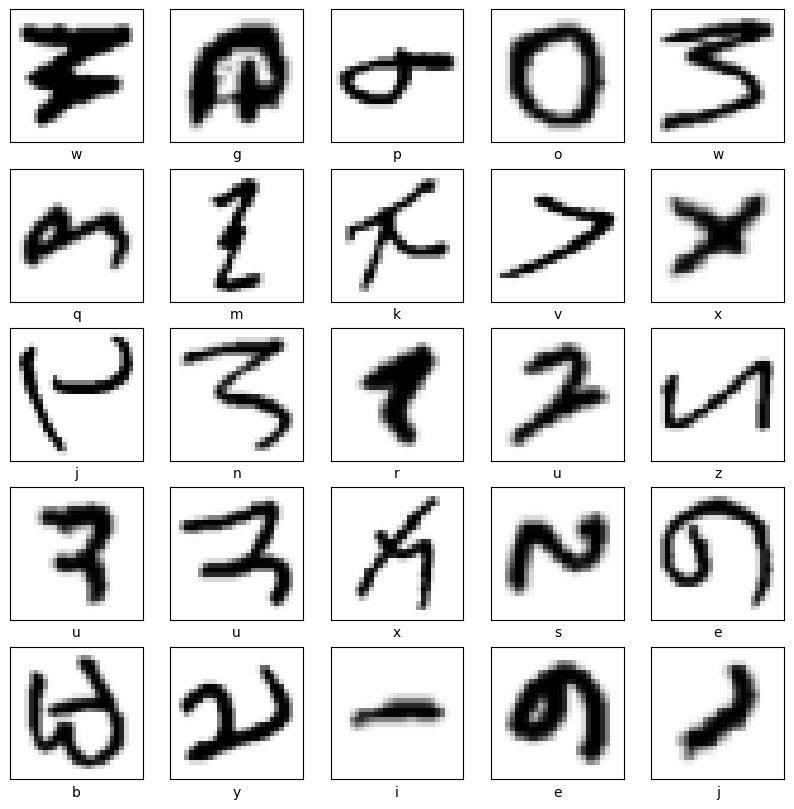

In [ ]:
def show_emnist_samples(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(chr(labels[i] + 96))  # Ubah label menjadi huruf
    plt.show()

show_emnist_samples(train_images_emnist, train_labels_emnist)

## Step 8: Data Preprocessing for EMNIST
Before training the model, we need to preprocess the data, including normalization and one-hot encoding for the labels.

In [ ]:
# Normalisasi dan Reshape data
train_images_emnist = train_images_emnist.astype('float32') / 255.
test_images_emnist = test_images_emnist.astype('float32') / 255.

# Menambah dimensi channel
train_images_emnist = np.expand_dims(train_images_emnist, -1)
test_images_emnist = np.expand_dims(test_images_emnist, -1)

# Melakukan one-hot encoding terhadap label
num_classes = 26  # Jumlah huruf di alfabet
train_labels_emnist = tf.keras.utils.to_categorical(train_labels_emnist - 1, num_classes)
test_labels_emnist = tf.keras.utils.to_categorical(test_labels_emnist - 1, num_classes)

print(f"Shape of training images: {train_images_emnist.shape}")
print(f"Shape of training labels: {train_labels_emnist.shape}")
print(f"Shape of test images: {test_images_emnist.shape}")
print(f"Shape of test labels: {test_labels_emnist.shape}")

Shape of training images: (124800, 28, 28, 1)
Shape of training labels: (124800, 26)
Shape of test images: (20800, 28, 28, 1)
Shape of test labels: (20800, 26)


## Step 9: Building the Model
We will build a CNN model using Keras.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

## Step 10: Training the Model
We will train the model using the training data and validate it using the test data.

In [ ]:
history = model.fit(train_images_emnist, train_labels_emnist, epochs=10, batch_size=128, validation_data=(test_images_emnist, test_labels_emnist))

Epoch 1/10
975/975 [==============================] - 11s 5ms/step - loss: 0.7433 - accuracy: 0.7738 - val_loss: 0.2546 - val_accuracy: 0.9162
Epoch 2/10
975/975 [==============================] - 6s 7ms/step - loss: 0.3297 - accuracy: 0.8946 - val_loss: 0.2107 - val_accuracy: 0.9299
Epoch 3/10
975/975 [==============================] - 5s 5ms/step - loss: 0.2707 - accuracy: 0.9136 - val_loss: 0.2060 - val_accuracy: 0.9324
Epoch 4/10
975/975 [==============================] - 5s 5ms/step - loss: 0.2373 - accuracy: 0.9219 - val_loss: 0.1904 - val_accuracy: 0.9368
Epoch 5/10
975/975 [==============================] - 6s 6ms/step - loss: 0.2160 - accuracy: 0.9283 - val_loss: 0.1828 - val_accuracy: 0.9364
Epoch 6/10
975/975 [==============================] - 5s 5ms/step - loss: 0.1986 - accuracy: 0.9332 - val_loss: 0.1791 - val_accuracy: 0.9391
Epoch 7/10
975/975 [==============================] - 6s 6ms/step - loss: 0.1849 - accuracy: 0.9371 - val_loss: 0.1831 - val_accuracy: 0.9415
Epoch

## Step 11: Evaluating the Model
We will evaluate the model using the test data and display the results.

In [ ]:
test_loss, test_acc = model.evaluate(test_images_emnist, test_labels_emnist)
print(f"Test accuracy: {test_acc}")

650/650 [==============================] - 2s 3ms/step - loss: 0.1782 - accuracy: 0.9435
Test accuracy: 0.9435096383094788


## Step 12: Visualizing the Training Process
We will visualize the accuracy and loss during training.

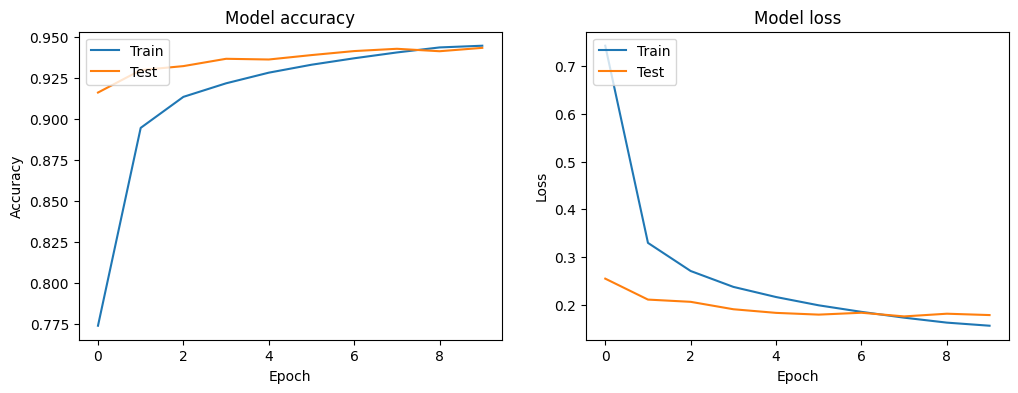

In [ ]:
# Menampilkan grafik nilai akurasi pada data latih dan validasi.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Menampilkan grafik nilai loss pada data latih dan validasi.
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

## Step 13: Saving the Model
We will save the trained model for future use.

In [ ]:
model.save(os.path.join(drive_dir, 'emnist_letters_model.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Step 14: Loading and Testing the Model
We will load the saved model and perform predictions to test the model.

650/650 [==============================] - 1s 2ms/step


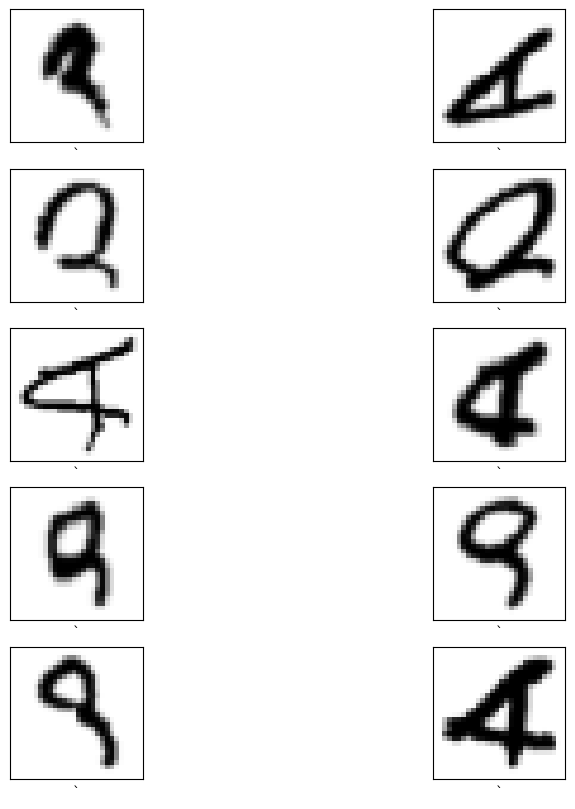

In [ ]:
# Memuat model yang telah disimpan sebelumnya
loaded_model = tf.keras.models.load_model(os.path.join(drive_dir, 'emnist_letters_model.h5'))

# Menguji model yang telah dimuat
predictions = loaded_model.predict(test_images_emnist)

# Menampilkan 10 gambar uji pertama beserta label prediksi
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images_emnist[i], cmap=plt.cm.binary)
    plt.xlabel(chr(np.argmax(predictions[i]) + 96))
plt.show()


## Step 15: Convert Model to TFLite Format

In this step, we will convert the trained Keras model into TensorFlow Lite `TFLite` format. TFLite models are optimized for mobile and embedded device deployment, making them suitable for running on Android devices. We will also save the converted TFLite model to a file and upload it to Google Drive for easy access and download.

In [ ]:
# Convert the Keras model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('converted_model.tflite', 'wb') as f:
    f.write(tflite_model)

# Save the TFLite model to Google Drive
with open(os.path.join(drive_dir, 'converted_model.tflite'), 'wb') as f:
    f.write(tflite_model)